## -<<!Objectives!>>-
I.Developing a classical introductory end-to-end ML project
-- Consisting of:

a) Discovering and Visualising the problem to gain insights
b) Feature Engineering
c) Preparing the data-set for ML algorithms
d) Models Selection
e) Fine-tuing Solution
f) Presenting Solution

In [1]:
import os
import sys
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

plt.style.use('dark_background')
assert sys.version_info >= (3, 5)

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}

Housing_path = os.path.join("datasets", "housing_path")


def load_data(housinh_path = Housing_path):
    csv_path = os.path.join(housinh_path, "housing.csv")
    return pd.read_csv(csv_path)
    

housing_data  = load_data(Housing_path)
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Visualization of the raw-data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

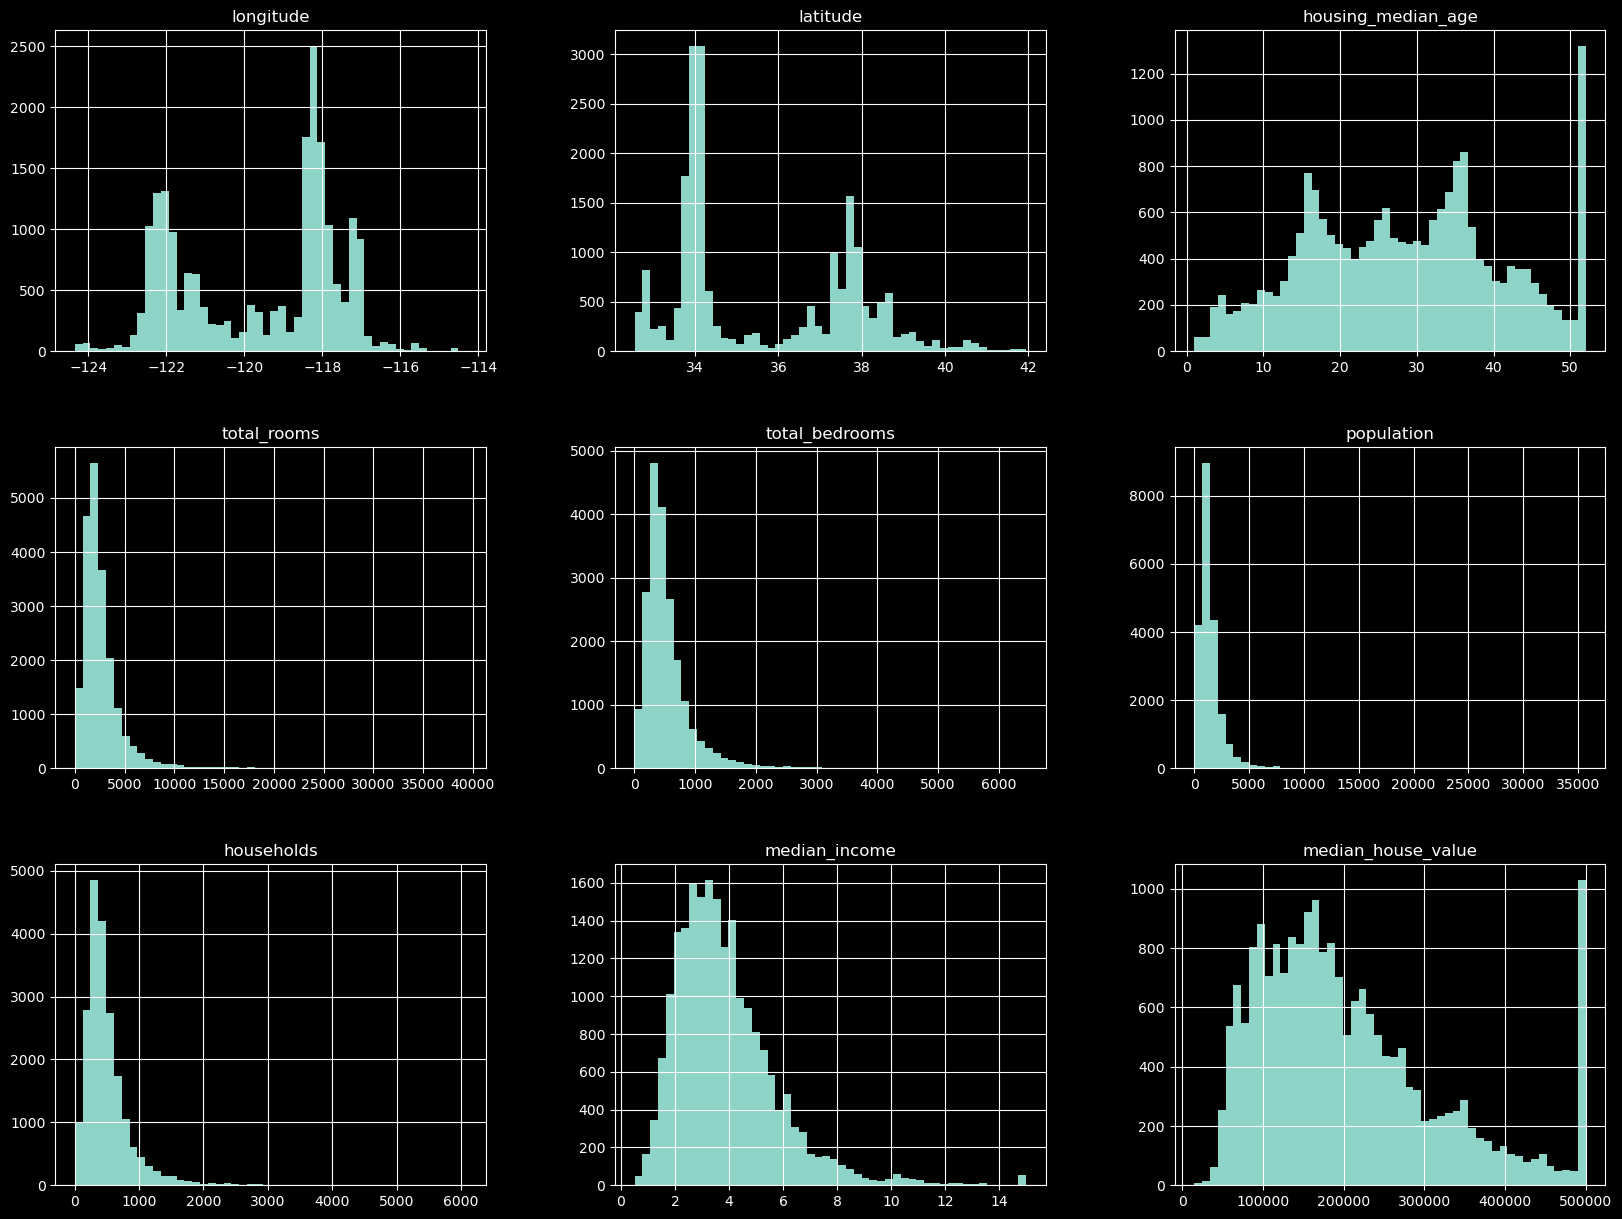

In [3]:
housing_data.hist(bins = 50, figsize = (20,15))

<Axes: >

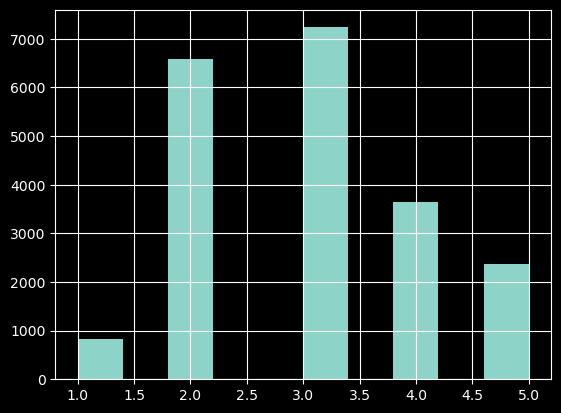

In [2]:
train_set, test_set = train_test_split(housing_data, test_size = 0.2, random_state = 42)
import numpy as np
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
                                   bins=[0.,1.5,3.0,4.5,6. , np.inf], labels = [1,2,3,4,5])
housing_data["income_cat"].hist()

In [3]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
#Unsure -> how does the splitted data never gets merged on subsequent trains ?
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]


strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

<Axes: xlabel='longitude', ylabel='latitude'>

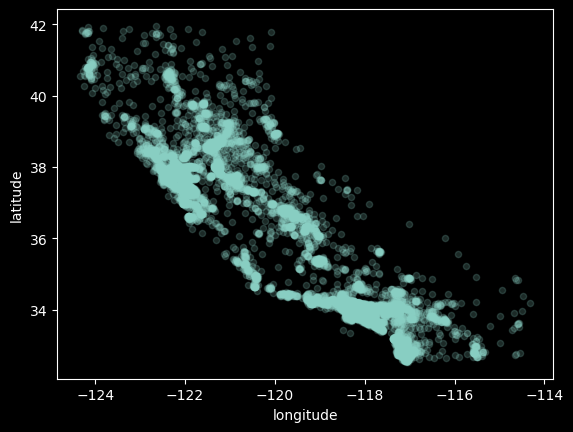

In [4]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    
housing_data = strat_train_set.copy()

housing_data.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.2)

<Axes: xlabel='longitude', ylabel='latitude'>

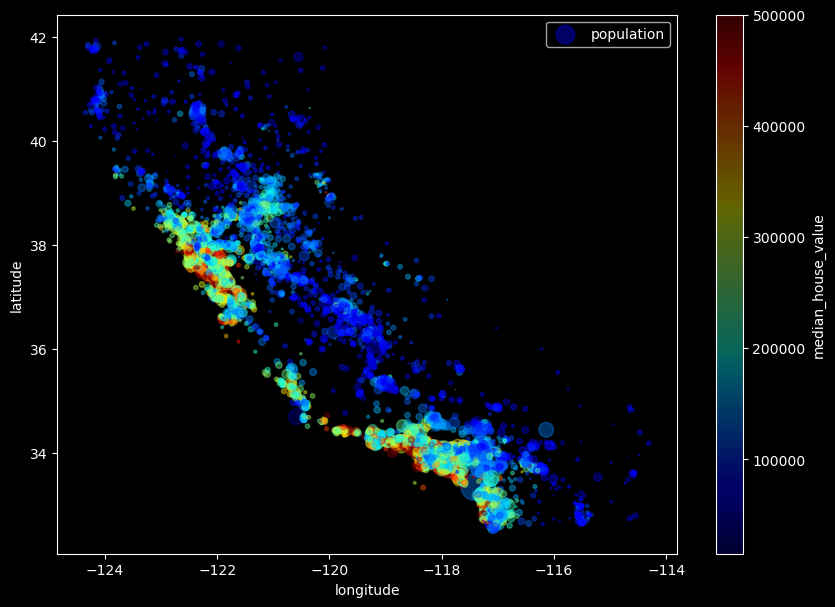

In [5]:
import matplotlib as plt
housing_data.plot(kind="scatter", x= "longitude", y ="latitude", alpha =0.4,
                 s = housing_data["population"]/100, label ="population", figsize = (10,7),
                 c = "median_house_value", cmap = plt.pyplot.get_cmap("jet"), colorbar = True)

## Observing for Correlations and Consistencies

In [6]:
correlation_matrix = housing_data.corr()
correlation_matrix["median_house_value"].sort_values(ascending = False)

/tmp/ipykernel_10816/3925099257.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing_data.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

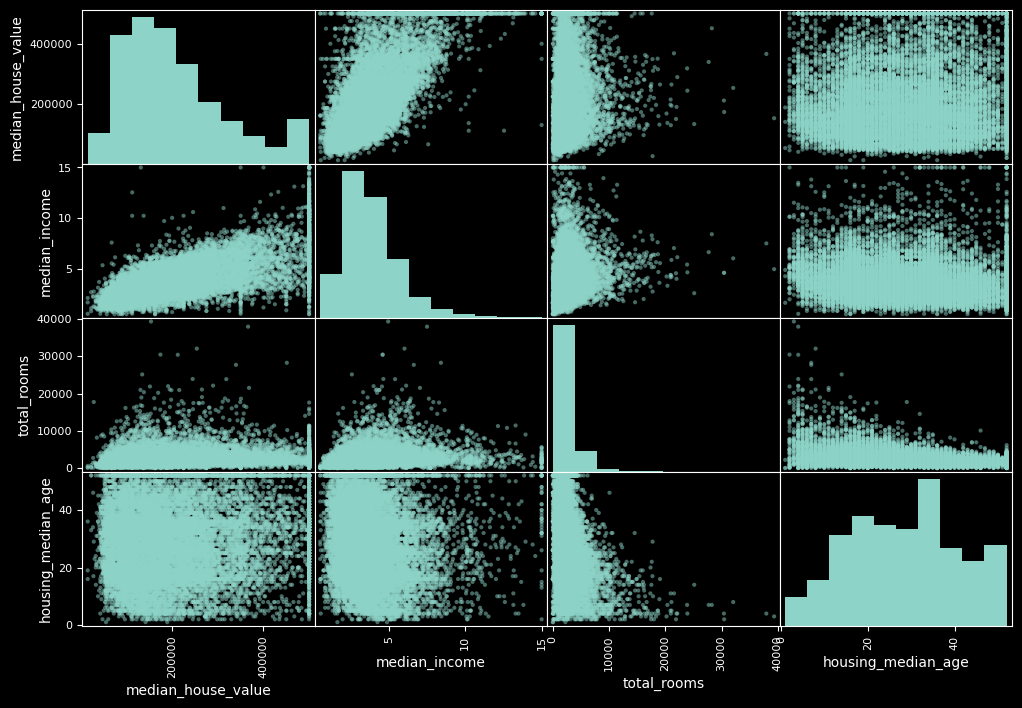

In [7]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_data[attributes], figsize=(12,8))

## Experimenting with Atribute Combinations

In [8]:
housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_household"]=housing_data["population"]/housing_data["households"]



# Prepare the Data for Machine Learning Algorithms

In [9]:
housing_data = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()
#setting sudo-random values for the missing data on "total_bedrooms" 
median = housing_data["total_bedrooms"].median()
housing_data["total_bedrooms"].fillna(median, inplace = True)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing_data.drop("ocean_proximity", axis =1)
imputer.fit(housing_num)
imputer.statistics_
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

## Handling Text and Categorical Attributes

In [10]:
X = imputer.transform(housing_num)
houaing_tr = pd.DataFrame(X,columns=housing_num.columns, index=housing_num.index)
housing_cat = housing_data[["ocean_proximity"]]
housing_cat.head(15)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [11]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [12]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Custom Transformers

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_data.values)

## Transformation Pipelines

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler()),])

housing_num_tr = num_pipeline.fit_transform(housing_num)

from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing_data)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels);

# Select and Train a Model

In [15]:
some_data = housing_data.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
#print("Predictions:", lin_reg.predict(some_data_prepared))
#print("Labels:", list(some_labels))

from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
#Linear Regression
print(lin_rmse)


68627.88276693555


In [16]:
#Trainging DecisionTree -> It heavily overfits
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


In [17]:
# training a support vector machine
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111095.06635291968

# Fine-Tuning the model

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]},
]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)
#could that be optimized ?
grid_search.best_params_
grid_search.best_estimator_



RandomForestRegressor(max_features=8, n_estimators=30)

In [19]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.71953800e-02, 6.53944380e-02, 4.46761204e-02, 1.57301545e-02,
       1.49150046e-02, 1.44196734e-02, 1.41451735e-02, 3.66249255e-01,
       3.86216060e-02, 1.13932353e-01, 7.87642084e-02, 4.70723112e-03,
       1.56368022e-01, 9.70581673e-05, 1.80681169e-03, 2.97750990e-03])

In [20]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)
        

[(0.36624925529489305, 'median_income'),
 (0.15636802234544092, 'INLAND'),
 (0.11393235253432026, 'pop_per_hhold'),
 (0.07876420841419421, 'bedrooms_per_room'),
 (0.06719538003588889, 'longitude'),
 (0.06539443801556946, 'latitude'),
 (0.04467612043250769, 'housing_median_age'),
 (0.03862160601185305, 'rooms_per_hhold'),
 (0.015730154488504768, 'total_rooms'),
 (0.014915004591365012, 'total_bedrooms'),
 (0.01441967341918591, 'population'),
 (0.014145173546760235, 'households'),
 (0.004707231119206608, '<1H OCEAN'),
 (0.002977509895698921, 'NEAR OCEAN'),
 (0.0018068116873421792, 'NEAR BAY'),
 (9.70581672688268e-05, 'ISLAND')]

## Evaluation

In [21]:

final_model = grid_search.best_estimator_ 
X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

from scipy import stats
confidance = 0.95
squared_errors = ( (final_predictions - Y_test) ** 2 )

np.sqrt(stats.t.interval(confidance, len(squared_errors) - 1 , loc = squared_errors.mean(), scale= stats.sem(squared_errors)))


array([45771.1413193 , 49677.16459575])

## Saving solution

In [43]:
import joblib
joblib.dump(final_rmse, "Real_Estate_Estimator.pkl")

['Real_Estate_Estimator.pkl']

## Optimizing Hyperparameters 

## Randomized Search

In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal


param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.3s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.0s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   8.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   8.0s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   8.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   8.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   8.0s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f383e509f60>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f383e509660>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [45]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54751.69009256623

In [46]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

## Misc Experimentation 

In [47]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

TypeError: 'module' object is not callable

In [50]:
def indices_of_top_k(arr,k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])
#what was base-estimator, tranformerMixnin
class Best_Feature_Select(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k

    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [51]:
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [52]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', Best_Feature_Select(feature_importances, k))
])
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing_data)
housing_prepared_top_k_features[0:3]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

In [53]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])